# Poly Stieltjes

In [109]:
from sympy import *

In [110]:
x, y, n, K, k, epsilon, z, s, a, R, N, r, T, b = symbols('x, y, n, K, k, epsilon, z, s, a, R, N, r, T, b')
alpha, beta, delta, t, mu, nu, epsilon, theta, phi = symbols('alpha, beta, delta, t, mu, nu, epsilon, theta, phi')

In [3]:
ps = Function("ps")
phz = Function("phz")

In [13]:
Eq(ps(k,a,b), Limit(Sum(log(n+a)**k/(n+b),(n,1,N)) - log(N)**(k+1)/(k+1),N,oo))

Eq(ps(k, a, b), Limit(Sum(log(a + n)**k/(b + n), (n, 1, N)) - log(N)**(k + 1)/(k + 1), N, oo, dir='-'))

In [22]:
Eq(phz(s,a,b), Sum(1/(n+a)**s/(n+b),(n,1,oo)))

Eq(phz(s, a, b), Sum((a + n)**(-s)/(b + n), (n, 1, oo)))

In [130]:
Eq(phz(s,a,b), Sum(1/(n+a)**s/(n+b),(n,1,oo))).subs([(a,1+a),(b,1+b)])

Eq(phz(s, a + 1, b + 1), Sum((a + n + 1)**(-s)/(b + n + 1), (n, 1, oo)))

In [133]:
Eq(phz(s,a+1,b+1), Sum((1/(n+a)**s/(n+b)).subs([(a,1+a),(b,1+b),(n,n-1)]),(n,2,oo)))

Eq(phz(s, a + 1, b + 1), Sum((a + n)**(-s)/(b + n), (n, 2, oo)))

In [135]:
Eq(phz(s,a+1,b+1),  - 1/(1+a)**s/(1+b) + Sum(1/(n+a)**s/(n+b),(n,1,oo)))

Eq(phz(s, a + 1, b + 1), Sum((a + n)**(-s)/(b + n), (n, 1, oo)) - (a + 1)**(-s)/(b + 1))

In [136]:
Eq(phz(s,a+1,b+1),  - 1/(1+a)**s/(1+b) + phz(s,a,b))

Eq(phz(s, a + 1, b + 1), phz(s, a, b) - (a + 1)**(-s)/(b + 1))

In [147]:
diff(ln(a+n)**s,a).simplify()

s*log(a + n)**(s - 1)/(a + n)

In [ ]:
Eq(-phz(s,a,b) + phz(s,a-1,b-1), 1/a**s/b).subs([(a,3/4),(b,b-1)])

In [193]:
Eq(phz(s,a,b) - 1/s, Sum(ps(k,a,b)*(-s)**k/factorial(k),(k,0,oo)))

Eq(phz(s, a, b) - 1/s, Sum((-s)**k*ps(k, a, b)/factorial(k), (k, 0, oo)))

In [194]:
Eq(phz(s,a,b), Sum(1/(n+a)**s/(n+b),(n,1,oo)))

Eq(phz(s, a, b), Sum((a + n)**(-s)/(b + n), (n, 1, oo)))

In [210]:
(Sum(1/(n+a)**s/(n+b),(n,1,N))-1/s).subs(s,s).subs([(a,2),(b,3),(N,1000000),(s,0.75)]).evalf()

-0.758382590255325

In [197]:
Sum((Sum(log(n+a)**k/(n+b),(n,1,N)) - log(N)**(k+1)/(k+1)).subs(N,100)*(-s)**k/factorial(k),
    (k,0,40)).subs([(a,2),(b,3),(N,60),(s,0.75)]).evalf()

-0.757394558921913

In [172]:
(Sum(log(n+a)**k/(n+b) - log(N)**(k+1)/(k+1),(n,1,N))/(factorial(k))).subs([(a,20),(b,3),(N,30),(k,0)]).evalf()

-99.7804565574585

In [181]:
Sum((log(n+a)**k/(n+b) - log(N)**(k+1)/(k+1)).subs(k,0),(n,1,N)).subs([(b,1),(N,200)]).evalf()

-1054.78046723711

In [174]:
(-digamma(3+1)).evalf()

-1.25611766843180

In [117]:
diff((-1)**k*(s)**k,s,5).simplify().factor()

(-1)**k*k*s**(k - 5)*(k - 4)*(k - 3)*(k - 2)*(k - 1)

In [31]:
# https://en.wikipedia.org/wiki/Ramanujan%27s_master_theorem

In [211]:
Eq(Integral(s**(t-1)*(phz(s,a,b) - 1/s),(s,0,oo)),gamma(t)*ps(-t,a,b))

Eq(Integral(s**(t - 1)*(phz(s, a, b) - 1/s), (s, 0, oo)), ps(-t, a, b)*gamma(t))

In [127]:
Integral((1/gamma(t)*s**(t-1)*(Sum(1/(n+a)**s/(n+b),(n,1,N)))).subs([(a,10),(b,10),(t,1/2),(N,20)]),(s,0,50)).evalf()

0.989165360171550

In [212]:
(Sum(log(n+a)**k/(n+b),(n,1,N)) - log(N)**(k+1)/(k+1)).subs([(a,10),(b,10),(k,-1/2),(N,200)]).evalf()

-2.22557935322473

In [48]:
limit(diff(1/(n+a)**s/(n+b),s),s,0)

-log(a + n)/(b + n)

In [57]:
limit(diff(s**2*ps(k,a,b)*(-s)**k/factorial(k),s,2),k,0)

2*ps(0, a, b)

In [62]:
limit(diff(Sum(ps(k,a,b)*(-s)**k/factorial(k),(k,0,2)).doit(),s),s,0)

-ps(1, a, b)

In [64]:
limit(diff(Sum(-s*ps(k,a,b)*(-s)**k/factorial(k),(k,0,2)).doit(),s,2),s,0)

2*ps(1, a, b)

In [66]:
limit(diff(-s/(n+a)**s/(n+b),s,2),s,0)

2*log(a + n)/(b + n)

In [217]:
limit((diff(x**(s-1)/gamma(s),s)),s,0)

Limit(x**(s - 1)*log(x)/gamma(s) - x**(s - 1)*polygamma(0, s)/gamma(s), s, 0)

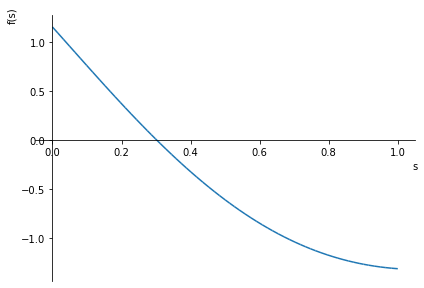

In [99]:
plot((polygamma(0,s)**2-polygamma(1,s))/gamma(s),(s,0.00001,1))

In [68]:
Eq(Sum(1/(n+a)/(n+b)-1/(n+1-a)/(n+b),(n,0,oo)),Sum(1/(n+a)/(n+b)-1/(n+1-a)/(n+b),(n,0,oo)).doit())

Eq(Sum(-1/((b + n)*(-a + n + 1)) + 1/((a + n)*(b + n)), (n, 0, oo)), ((-a*b + b)*lerchphi(1, 1, 1 - a)/(a + b - 1) + (a*b - b)*lerchphi(1, 1, b)/(a + b - 1))/(b*(a - 1)) + (-a*b*lerchphi(1, 1, a)/(a - b) + a*b*lerchphi(1, 1, b)/(a - b))/(a*b))

In [71]:
diff(lerchphi(1,1,1-a)/(a+b-1),a)

lerchphi(1, 2, 1 - a)/(a + b - 1) - lerchphi(1, 1, 1 - a)/(a + b - 1)**2

In [75]:
Eq(Sum(1/(a+n)/(b+n),(n,0,oo)), Sum(1/(a+n)/(b+n),(n,0,oo)).doit().expand())

Eq(Sum(1/((a + n)*(b + n)), (n, 0, oo)), -lerchphi(1, 1, a)/(a - b) + lerchphi(1, 1, b)/(a - b))

In [90]:
Eq(Sum(1/(a+n)/(b+n),(n,0,oo)), (digamma(a) - digamma(b))/(a-b))

Eq(Sum(1/((a + n)*(b + n)), (n, 0, oo)), (polygamma(0, a) - polygamma(0, b))/(a - b))

In [215]:
(1/(b+n) - 1/(a+n)).simplify()

(a - b)/((a + n)*(b + n))

In [3]:
Eq(Sum(1/(a+n)/(b+n),(n,0,oo)), (Integral(exp(-a*z)/(1-exp(-z))-exp(-b*z)/(1-exp(-z)), (z,0,oo)))/(a-b))

Eq(Sum(1/((a + n)*(b + n)), (n, 0, oo)), Integral(-exp(-b*z)/(1 - exp(-z)) + exp(-a*z)/(1 - exp(-z)), (z, 0, oo))/(a - b))

In [13]:
Integral((x-t)**(alpha-1)*(t-b),(t,0,x)).doit().simplify()

Integral((-b + t)*(-t + x)**(alpha - 1), (t, 0, x))

In [14]:
diff(1/(n+a+b)**s,a)

-s*(a + b + n)**(-s)/(a + b + n)

In [19]:
Sum(x**n/(n+b),(n,0,oo)).doit()

Piecewise((lerchphi(x, 1, b), (x >= -1) & (x < 1)), (Sum(x**n/(b + n), (n, 0, oo)), True))

In [21]:
diff(y**s,s)

y**s*log(y)

In [25]:
Eq(Sum(1/(a+n)**s/(b+n),(n,0,oo))*gamma(s), Sum(1/(a+n)**s/(b+n),(n,0,oo))*Integral(x**(s-1)*exp(-x),(x,0,oo)))

Eq(gamma(s)*Sum((a + n)**(-s)/(b + n), (n, 0, oo)), Integral(x**(s - 1)*exp(-x), (x, 0, oo))*Sum((a + n)**(-s)/(b + n), (n, 0, oo)))

In [27]:
Eq(Sum(1/(a+n)**s/(b+n),(n,0,oo))*gamma(s), Integral(Sum(1/(a+n)**s/(b+n)*x**(s-1)*exp(-x),(n,0,oo)),(x,0,oo)))

Eq(gamma(s)*Sum((a + n)**(-s)/(b + n), (n, 0, oo)), Integral(Sum(x**(s - 1)*(a + n)**(-s)*exp(-x)/(b + n), (n, 0, oo)), (x, 0, oo)))

In [28]:
Eq(Sum(1/(a+n)**s/(b+n),(n,0,oo))*gamma(s), Integral(Sum(1/(b+n)*x**(s-1)*exp(-x*(a+n)),(n,0,oo)),(x,0,oo)))

Eq(gamma(s)*Sum((a + n)**(-s)/(b + n), (n, 0, oo)), Integral(Sum(x**(s - 1)*exp(-x*(a + n))/(b + n), (n, 0, oo)), (x, 0, oo)))

In [35]:
Eq(Sum(exp(-x*n)/(b+n),(n,0,oo)), lerchphi(exp(-x),1,b))

Eq(Sum(exp(-n*x)/(b + n), (n, 0, oo)), lerchphi(exp(-x), 1, b))

In [38]:
Eq(Sum(1/(a+n)**s/(b+n),(n,0,oo)), 1/gamma(s)*Integral(x**(s-1)*exp(-x*a)*lerchphi(exp(-x),1,b),(x,0,oo)))

Eq(Sum((a + n)**(-s)/(b + n), (n, 0, oo)), Integral(x**(s - 1)*lerchphi(exp(-x), 1, b)*exp(-a*x), (x, 0, oo))/gamma(s))

In [5]:
Eq(exp(-x),mu)

Eq(exp(-x), mu)

In [9]:
Eq(-x,ln(mu))

Eq(-x, log(mu))

In [86]:
limit(diff(1/(a+n)**s/(b+n),s),s,0)

-log(a + n)/(b + n)

In [45]:
Eq(lerchphi(nu,s,mu), 1/gamma(s)*Integral(z**(s-1)*exp(-mu*z)/(1-nu*exp(-z)), (z,0,oo)))

Eq(lerchphi(nu, s, mu), Integral(z**(s - 1)*exp(-mu*z)/(-nu*exp(-z) + 1), (z, 0, oo))/gamma(s))

In [56]:
Eq(lerchphi(exp(-z),s,a), 1/gamma(s)*Integral(x**(s-1)*exp(-a*x)/(1-exp(-z)*exp(-x)), (x,0,oo)))

Eq(lerchphi(exp(-z), s, a), Integral(x**(s - 1)*exp(-a*x)/(1 - exp(-x)*exp(-z)), (x, 0, oo))/gamma(s))

In [48]:
Eq(lerchphi(nu,s,mu), 1/gamma(s)*Integral(z**(s-1)*exp(-mu*z)/(1-nu*exp(-z)), (z,0,oo))).subs([(nu,exp(-x)),(s,1),(mu,b)])

Eq(lerchphi(exp(-x), 1, b), Integral(exp(-b*z)/(1 - exp(-x)*exp(-z)), (z, 0, oo)))

In [57]:
Eq(Sum(1/(a+n)**s/(b+n),(n,0,oo)),
   1/gamma(s)*Integral(Integral(x**(s-1)*exp(-x*a)*exp(-b*z)/(1-exp(-x)*exp(-z)), (x,0,oo)),(z,0,oo)))

Eq(Sum((a + n)**(-s)/(b + n), (n, 0, oo)), Integral(x**(s - 1)*exp(-a*x)*exp(-b*z)/(1 - exp(-x)*exp(-z)), (x, 0, oo), (z, 0, oo))/gamma(s))

In [60]:
Eq(Sum(1/(a+n)**s/(b+n),(n,0,oo)), 1/gamma(s)*Integral(lerchphi(exp(-z),s,a)*exp(-b*z),(z,0,oo)))

Eq(Sum((a + n)**(-s)/(b + n), (n, 0, oo)), Integral(lerchphi(exp(-z), s, a)*exp(-b*z), (z, 0, oo))/gamma(s))

In [63]:
(Sum(1/(a+n)**s/(b+n),(n,0,100))).subs([(a,10),(b,2),(s,2)]).evalf()

0.0153887983676474

In [64]:
(1/gamma(s)*Integral(lerchphi(exp(-z),s,a)*exp(-b*z),(z,0,10))).subs([(a,10),(b,2),(s,2)]).evalf()

0.0154318369977372

In [68]:
Eq(phz(s,a,b), 1/gamma(s)*Integral(lerchphi(exp(-z),s,a)*exp(-b*z),(z,0,oo)))

Eq(phz(s, a, b), Integral(lerchphi(exp(-z), s, a)*exp(-b*z), (z, 0, oo))/gamma(s))

In [83]:
diff(lerchphi(z,s,a),s).doit()

Derivative(lerchphi(z, s, a), s)

In [84]:
diff(x**(s-1),s)

x**(s - 1)*log(x)

## Integral representation of Poly Stieltjes

In [12]:
Eq(ps(k,a,b), Limit(Sum(log(n+a)**k/(n+b),(n,1,N)) - log(N)**(k+1)/(k+1),N,oo))

Eq(ps(k, a, b), Limit(Sum(log(a + n)**k/(b + n), (n, 1, N)) - log(N)**(k + 1)/(k + 1), N, oo, dir='-'))

In [11]:
re(alpha)>0

re(alpha) > 0

In [107]:
Eq(Integral(exp(-alpha*x)*ln(x),(x,0,oo)),-(ln(alpha) + EulerGamma)/alpha)

Eq(Integral(exp(-alpha*x)*log(x), (x, 0, oo)), (-log(alpha) - EulerGamma)/alpha)

In [16]:
Eq(Derivative(ln(x)**n,x), diff(ln(x)**n,x).simplify())

Eq(Derivative(log(x)**n, x), n*log(x)**(n - 1)/x)

In [18]:
re(a)>-1

re(a) > -1

In [17]:
Eq(Integral(exp(-alpha*x)*ln(x),(x,0,oo)),-(ln(alpha) + EulerGamma)/alpha).subs(alpha,a+n)

Eq(Integral(exp(-x*(a + n))*log(x), (x, 0, oo)), (-log(a + n) - EulerGamma)/(a + n))

In [19]:
Eq(Integral(exp(-(a+n)*x)/(b+n)*ln(x),(x,0,oo)),-(ln((a+n)) + EulerGamma)/(a+n)/(b+n))

Eq(Integral(exp(x*(-a - n))*log(x)/(b + n), (x, 0, oo)), (-log(a + n) - EulerGamma)/((a + n)*(b + n)))

In [21]:
Eq(-Integral(Sum(exp(-(a+n)*x)/(b+n),(n,1,N))*ln(x),(x,0,oo)),Sum((ln((a+n)) + EulerGamma)/(a+n)/(b+n),(n,1,N)))

Eq(-Integral(log(x)*Sum(exp(x*(-a - n))/(b + n), (n, 1, N)), (x, 0, oo)), Sum((log(a + n) + EulerGamma)/((a + n)*(b + n)), (n, 1, N)))

In [26]:
Eq(Sum(ln(a+n)/(a+n)/(b+n),(n,1,N)) - log(N)**2/2,
 - log(N)**2/2 -EulerGamma*Sum(1/(a+n)/(b+n),(n,1,N))-Integral(exp(-a*x)*Sum(exp(-n*x)/(b+n),(n,1,N))*ln(x),(x,0,oo)))

Eq(-log(N)**2/2 + Sum(log(a + n)/((a + n)*(b + n)), (n, 1, N)), -log(N)**2/2 - Integral(exp(-a*x)*log(x)*Sum(exp(-n*x)/(b + n), (n, 1, N)), (x, 0, oo)) - EulerGamma*Sum(1/((a + n)*(b + n)), (n, 1, N)))

In [25]:
Eq(Sum(exp(-x*n)/(b+n),(n,0,oo)), lerchphi(exp(-x),1,b))

Eq(Sum(exp(-n*x)/(b + n), (n, 0, oo)), lerchphi(exp(-x), 1, b))

In [49]:
Eq(Sum(exp(-n*x),(n,1,oo)), 1/(exp(x)-1))

Eq(Sum(exp(-n*x), (n, 1, oo)), 1/(exp(x) - 1))

In [27]:
Eq(ps(k,a,b), Limit(Sum(log(n+a)**k/(n+b),(n,1,N)) - log(N)**(k+1)/(k+1),N,oo)).subs([(a,0),(b,0)])

Eq(ps(k, 0, 0), Limit(Sum(log(n)**k/n, (n, 1, N)) - log(N)**(k + 1)/(k + 1), N, oo, dir='-'))

In [28]:
Eq(ps(k,a,b), Limit(Sum(log(n+a)**k/(n+b),(n,1,N)) - log(N)**(k+1)/(k+1),N,oo)).subs([(a,0),(b,0),(k,1)])

Eq(ps(1, 0, 0), Limit(-log(N)**2/2 + Sum(log(n)/n, (n, 1, N)), N, oo, dir='-'))

In [33]:
Eq(Integral(exp(-alpha*x)*(ln(x)+EulerGamma),(x,0,oo)) + ln(alpha)/alpha, 0)

Eq(Integral((log(x) + EulerGamma)*exp(-alpha*x), (x, 0, oo)) + log(alpha)/alpha, 0)

In [36]:
Eq(Integral(exp(-n*x)*(ln(x)+EulerGamma),(x,0,oo)) + ln(n)/n, 0)

Eq(Integral((log(x) + EulerGamma)*exp(-n*x), (x, 0, oo)) + log(n)/n, 0)

In [50]:
Eq(Sum(ln(a+n)/(a+n)/(b+n),(n,1,N)) - log(N)**2/2,
 - log(N)**2/2 +Sum(log(n)/n,(n,1,N)) -EulerGamma*Sum(1/(a+n)/(b+n),(n,1,N))
   -Integral(exp(-a*x)*Sum(exp(-n*x)/(b+n),(n,1,N))*ln(x) - Sum(exp(-n*x),(n,1,N))*(ln(x)+EulerGamma),(x,0,oo)))

Eq(-log(N)**2/2 + Sum(log(a + n)/((a + n)*(b + n)), (n, 1, N)), -log(N)**2/2 - Integral(lerchphi(exp(-x), 1, b)*exp(-a*x)*log(x) - (log(x) + EulerGamma)/(exp(x) - 1), (x, 0, oo)) + Sum(log(n)/n, (n, 1, N)) - EulerGamma*Sum(1/((a + n)*(b + n)), (n, 1, N)))

In [108]:
Eq(ps(1,a,b),
 ps(1,0,0) - EulerGamma*(-lerchphi(1,1,a) + lerchphi(1,1,b))/(a-b)
   -Integral(exp(-a*x)*lerchphi(exp(-x),1,b)*ln(x) - 1/(exp(x)-1)*(ln(x)+EulerGamma),(x,0,oo)))

Eq(ps(1, a, b), ps(1, 0, 0) - Integral(lerchphi(exp(-x), 1, b)*exp(-a*x)*log(x) - (log(x) + EulerGamma)/(exp(x) - 1), (x, 0, oo)) - EulerGamma*(-lerchphi(1, 1, a) + lerchphi(1, 1, b))/(a - b))

In [123]:
Eq(lerchphi(nu,s,mu)*exp(-mu*delta), 
   Integral(
       (r*exp(I*theta))**(s-1)*exp(I*theta)*exp(-mu*(delta+r*exp(I*theta)))/(1-nu*exp(-r*exp(I*theta))),(r,0,oo))/gamma(s))

Eq(lerchphi(nu, s, mu)*exp(-delta*mu), Integral((r*exp(I*theta))**(s - 1)*exp(I*theta)*exp(-mu*(delta + r*exp(I*theta)))/(-nu*exp(-r*exp(I*theta)) + 1), (r, 0, oo))/gamma(s))

In [128]:
Eq(lerchphi(nu,s,mu)*exp(-mu*delta), 
   Integral(
       (r*exp(I*theta))**(s-1)*exp(I*theta)*exp(-mu*(delta+r*exp(I*theta)))/(1-nu*exp(-r*exp(I*theta))),(r,0,oo))/gamma(s)
  ).subs([(nu,exp(-x)),(s,1),(mu,b),(delta,0)])

Eq(lerchphi(exp(-x), 1, b), Integral(exp(I*theta)*exp(-b*r*exp(I*theta))/(1 - exp(-x)*exp(-r*exp(I*theta))), (r, 0, oo)))

In [97]:
Eq(lerchphi(nu,s,mu), 1/gamma(s)*Integral(z**(s-1)*exp(-mu*z)/(1-nu*exp(-z)), (z,0,oo))).subs([(nu,exp(-x)),(s,1),(mu,b)])

Eq(lerchphi(exp(-x), 1, b), Integral(exp(-b*z)/(1 - exp(-x)*exp(-z)), (z, 0, oo)))

In [56]:
Eq(Sum(1/(a+n)**s/(b+n),(n,0,oo)), 1/gamma(s)*Integral(lerchphi(exp(-z),s,a)*exp(-b*z),(z,0,oo)))

Eq(Sum((a + n)**(-s)/(b + n), (n, 0, oo)), Integral(lerchphi(exp(-z), s, a)*exp(-b*z), (z, 0, oo))/gamma(s))

In [ ]:
Eq(
    Integral(exp(-a*x)*Sum(exp(-n*x)/(b+n),(n,1,N))*ln(x),(x,0,oo)),
    Integral(exp(-a*x)*Sum(exp(-n*x)/(b+n),(n,1,N))*ln(x),(x,0,oo))
)

In [72]:
Ux = ln(x)
dUx = 1/x
dVx = exp(-a*x)*Sum(exp(-n*x)/(b+n),(n,1,N))
Vx = Sum(exp(-(a+n)*x)/(b+n)/(a+n),(n,1,N))

In [88]:
Eq(Integral(Ux*dVx,(x,epsilon,R)), Limit((Ux*Vx),x,R) - Limit((Ux*Vx),x,epsilon) - Integral(dUx*Vx,(x,epsilon,R)))

Eq(Integral(exp(-a*x)*log(x)*Sum(exp(-n*x)/(b + n), (n, 1, N)), (x, epsilon, R)), -Integral(Sum(exp(x*(-a - n))/((a + n)*(b + n)), (n, 1, N))/x, (x, epsilon, R)) + Limit(log(x)*Sum(exp(x*(-a - n))/((a + n)*(b + n)), (n, 1, N)), x, R) - Limit(log(x)*Sum(exp(x*(-a - n))/((a + n)*(b + n)), (n, 1, N)), x, epsilon))

In [93]:
Eq(
    Integral(exp(-a*x)*log(x)*Sum(exp(-n*x)/(b+n),(n,1,oo)),(x,epsilon,R)),
    -Integral(exp(-a*x)/x*Sum(exp(-n*x)/(b+n)/(a+n),(n,1,oo)),(x,epsilon,R)) 
    - Limit(log(x)*Sum(exp(-(a+n)*x)/(b+n)/(a+n),(n,1,oo)),x,epsilon)
)

Eq(Integral(exp(-a*x)*log(x)*Sum(exp(-n*x)/(b + n), (n, 1, oo)), (x, epsilon, R)), -Integral(exp(-a*x)*Sum(exp(-n*x)/((a + n)*(b + n)), (n, 1, oo))/x, (x, epsilon, R)) - Limit(log(x)*Sum(exp(x*(-a - n))/((a + n)*(b + n)), (n, 1, oo)), x, epsilon))

In [99]:
Eq(Integral(exp(-alpha*x)*(ln(x)+EulerGamma),(x,0,oo)) + ln(alpha)/alpha, 0)

Eq(Integral((log(x) + EulerGamma)*exp(-alpha*x), (x, 0, oo)) + log(alpha)/alpha, 0)

In [102]:
U2x = ln(x)+EulerGamma
dU2x = 1/x
dV2x = exp(-a*x)
V2x = -exp(-a*x)/a

In [103]:
Eq(Integral(U2x*dV2x,(x,epsilon,R)), Limit((U2x*V2x),x,R) - Limit((U2x*V2x),x,epsilon) - Integral(dU2x*V2x,(x,epsilon,R)))

Eq(Integral((log(x) + EulerGamma)*exp(-a*x), (x, epsilon, R)), -Integral(-exp(-a*x)/(a*x), (x, epsilon, R)) + Limit(-(log(x) + EulerGamma)*exp(-a*x)/a, x, R) - Limit(-(log(x) + EulerGamma)*exp(-a*x)/a, x, epsilon))

In [106]:
Eq(-ln(alpha)/alpha, - Limit((U2x*V2x),x,epsilon) - Integral(dU2x*V2x,(x,epsilon,R)))

Eq(-log(alpha)/alpha, -Integral(-exp(-a*x)/(a*x), (x, epsilon, R)) - Limit(-(log(x) + EulerGamma)*exp(-a*x)/a, x, epsilon))

In [111]:
Eq(Sum(1/(a+n)**s/(b+n),(n,0,oo)),
   1/gamma(s)*Integral(Integral(x**(s-1)*exp(-x*a)*exp(-b*z)/(1-exp(-x)*exp(-z)), (x,0,oo)),(z,0,oo)))

Eq(Sum((a + n)**(-s)/(b + n), (n, 0, oo)), Integral(x**(s - 1)*exp(-a*x)*exp(-b*z)/(1 - exp(-x)*exp(-z)), (x, 0, oo), (z, 0, oo))/gamma(s))

In [122]:
diff(gamma(s)/(a+n)**s,s)

-(a + n)**(-s)*log(a + n)*gamma(s) + (a + n)**(-s)*gamma(s)*polygamma(0, s)

In [116]:
diff(x**(s-1),s,2)

x**(s - 1)*log(x)**2